In [3]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
%matplotlib inline
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size
pylab.rcParams['figure.figsize'] = (6.0, 4.0) # this controls figure size in the notebook

In [ ]:
import kagglehub


# Download latest version
path = kagglehub.dataset_download("zaraks/pascal-voc-2007")

print("Path to dataset files:", path)

/Users/silvanusbordignon/Documents/Università/4° anno/Primo semestre/Signal, Image and Video/siv/venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/silvanusbordignon/.cache/kagglehub/datasets/zaraks/pascal-voc-2007/versions/1


In [29]:
import os
from PIL import Image
import random

# We open an image from the dataset and take a random 16x16 patch (256 px total)
def generate_patch(path, height, width, verbose=False):
    """
    Generate a height x width greyscale patch from a random
    image sampled from the ones in the given path
    """
    
    # List all image files in the directory
    image_files = [os.path.join(path, f) for f in os.listdir(path) if f.endswith('.jpg') or f.endswith('.png')]

    # Filter images based on size
#    valid_images = []
#    for image_file in image_files:
#        with Image.open(image_file) as img:
#            if img.size[0] >= width and img.size[1] >= height:
#                valid_images.append(image_file)
#
#    if verbose:
#        print(f"Found {len(valid_images)} valid images")

    # Select a random image from the valid images
    random_image = random.choice(image_files)

    # Open the selected image
    with Image.open(random_image) as img:
        # Generate a random patch
        x = random.randint(0, img.size[0] - width)
        y = random.randint(0, img.size[1] - height)
        patch = img.crop((x, y, x + width, y + height))

    return patch

Found 4923 valid images


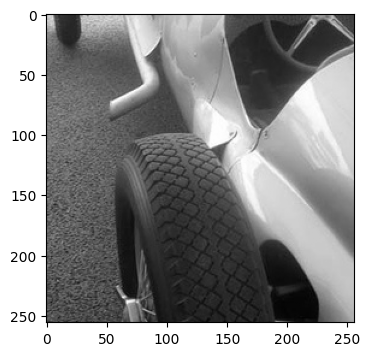

In [7]:
# Let's generate a patch a plot it to check the correctness of the function

import numpy
import cv2

patch = generate_patch(path + "/VOCtrainval_06-Nov-2007/VOCdevkit/VOC2007/JPEGImages", 256, 256, True)

open_cv_patch = numpy.array(patch)
open_cv_patch = cv2.cvtColor(open_cv_patch, cv2.COLOR_RGB2GRAY)

plt.imshow(open_cv_patch, cmap='grey')

In [33]:
from sklearn.decomposition import MiniBatchDictionaryLearning

# Initialize an empty list to store patches
patches = []

for i in range(10**4):
    patch = generate_patch(path + "/VOCtrainval_06-Nov-2007/VOCdevkit/VOC2007/JPEGImages", 8, 8, False)
    patch = numpy.array(patch).flatten()  # Flatten the patch to a 1D array
    patches.append(patch)

# Convert the list of patches to a numpy array
dataset = numpy.array(patches)

print(dataset.shape)  # Check the shape of the dataset

ALPHA = 1
BATCH_SIZE = 256
SEED = 0

model = MiniBatchDictionaryLearning(alpha=ALPHA, max_iter=1000, n_jobs=-1, fit_algorithm='lars', batch_size=BATCH_SIZE, random_state=SEED)
model.fit(dataset)

(10000, 192)


MiniBatchDictionaryLearning(n_jobs=-1, random_state=0)

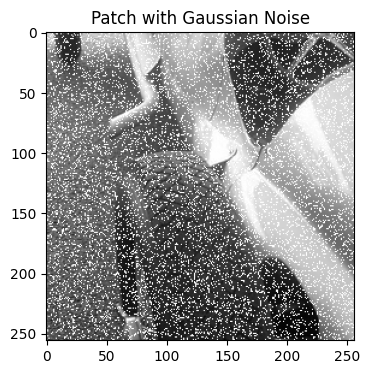

In [40]:
def add_gaussian_noise(image, mean=0, std=1):
    """
    Add Gaussian noise to an image.
    
    Parameters:
    - image: numpy.ndarray, input image
    - mean: float, mean of the Gaussian noise
    - std: float, standard deviation of the Gaussian noise
    
    Returns:
    - noisy_image: numpy.ndarray, image with added Gaussian noise
    """
    # Generate Gaussian noise
    gaussian_noise = numpy.random.normal(mean, std, image.shape).astype('uint8')
    
    # Add the Gaussian noise to the image
    noisy_image = cv2.add(image, gaussian_noise)
    
    return noisy_image

# Example usage
noisy_patch = add_gaussian_noise(open_cv_patch)
plt.imshow(noisy_patch, cmap='gray')
plt.title('Patch with Gaussian Noise')
plt.show()